# 트리 알고리즘

## 1. 로지스틱 회귀로 와인 분류하기

In [4]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [6]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [8]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy() # input data
target = wine[['class']].to_numpy()

In [9]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [10]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [11]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [12]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


C:\Users\BOAZ JEONG OH KANG\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### 설명하기 쉬운 모델과 어려운 모델

In [14]:
print(lr.coef_, lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


#### 결정 트리

##### 이유를 설명하기 쉽다.
##### 사이킷런의 DecisionTreeClassifier클래스를 사용

In [17]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8653846153846154


##### plot_tree함수를 사용해 결정 트리를 이해하기 쉬운 트리 그림으로 출력해 준다.

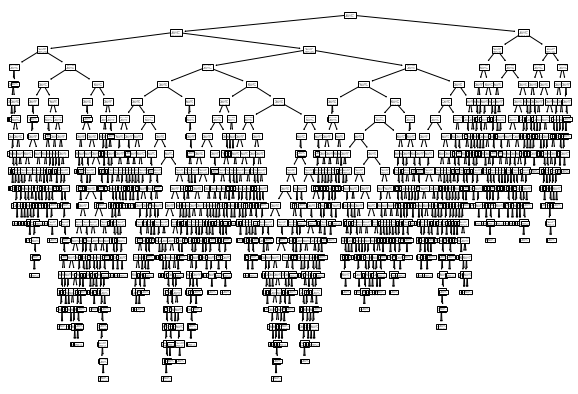

In [20]:
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree

plt.figure(figsize=(10, 7))
plot_tree(dt)
plt.show()

# 맨위 : 루프 노드
# 맨 아래: 리프 노드

##### max_depth 매개변수를 1로 주면 루트 노드를 제외하고 하나의 노드를 더 확장하여 그린다.
##### filled 매개변수에서 클래스에 맞게 노드의 색을 칠할 수 있다.
##### feature_names 매개변수에는 특성의 이름을 전달할 수 있다.

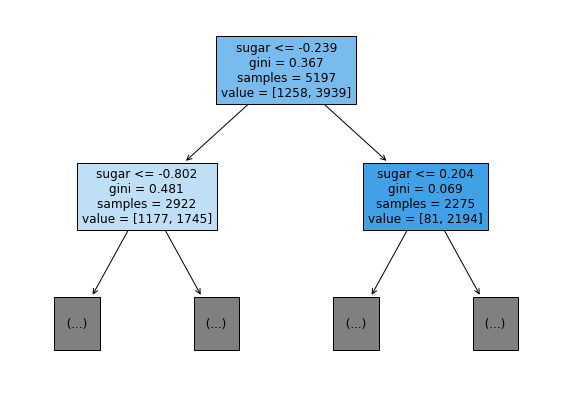

In [22]:
plt.figure(figsize=(10, 7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

##### 테스트 조건(sugar)
##### 불순도(gini)
##### 총 샘플 수(samples)
##### 클래스별 샘플 수(value) -- [음성 클래스(레드와인), 양성 클래스(화이트 와인)]

#### 불순도 (gini)

##### DecisionTreeClassifier 클래스의 criterion 매개변수의 기본값이 'gini'이다.
##### criterion 매개변수의 용도는 노드에서 데이터를 분할할 기준을 정하는 것이다.
##### 앞의 그린 트리에서 루트 노드는 어떻게 당도 -0.239를 기준으로 왼쪽과 오른쪽 노드로 나누었을까?
##### 바로 criterion 매개변수에 지정한 지니 불순도를 사용한다.

##### <지니 불순도 계산법>
##### 지니 불순도 = 1 - (음성 클래스 비율**2 + 양성 클래스 비율**2)

#### 가지치기

##### 결정 트리도 가지치기를 해야 한다.
##### 훈련 세트에는 아주 잘 맞겠지만 테스트 세트에서 점수는 그에 못 미칠 것이다.
##### 이를 두고 일반화가 잘 안 될 것 같다고 말한다.

##### 결정 트리에서 가지치기를 하는 가장 간단한 방법은 자라날 수 있는 트리의 최대 깊이를 지정하는 것이다. (max_depth)

In [28]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


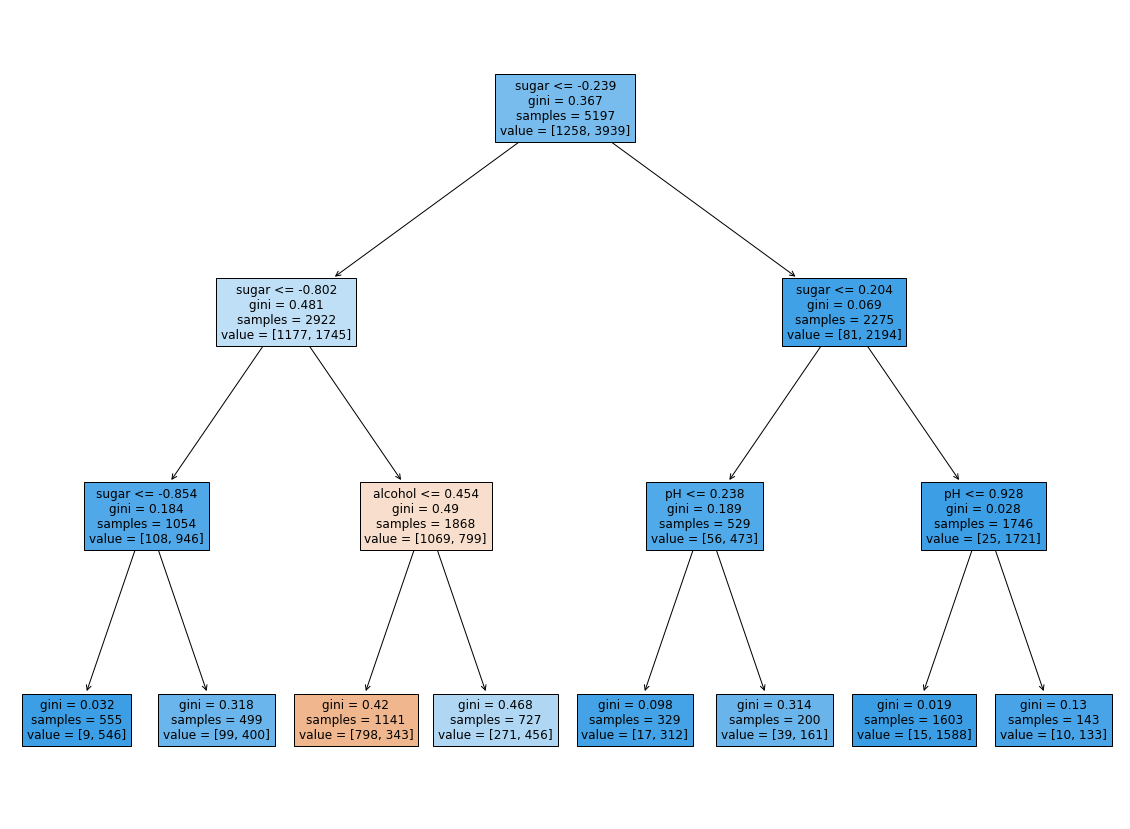

In [29]:
plt.figure(figsize=(20, 15))

plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [30]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


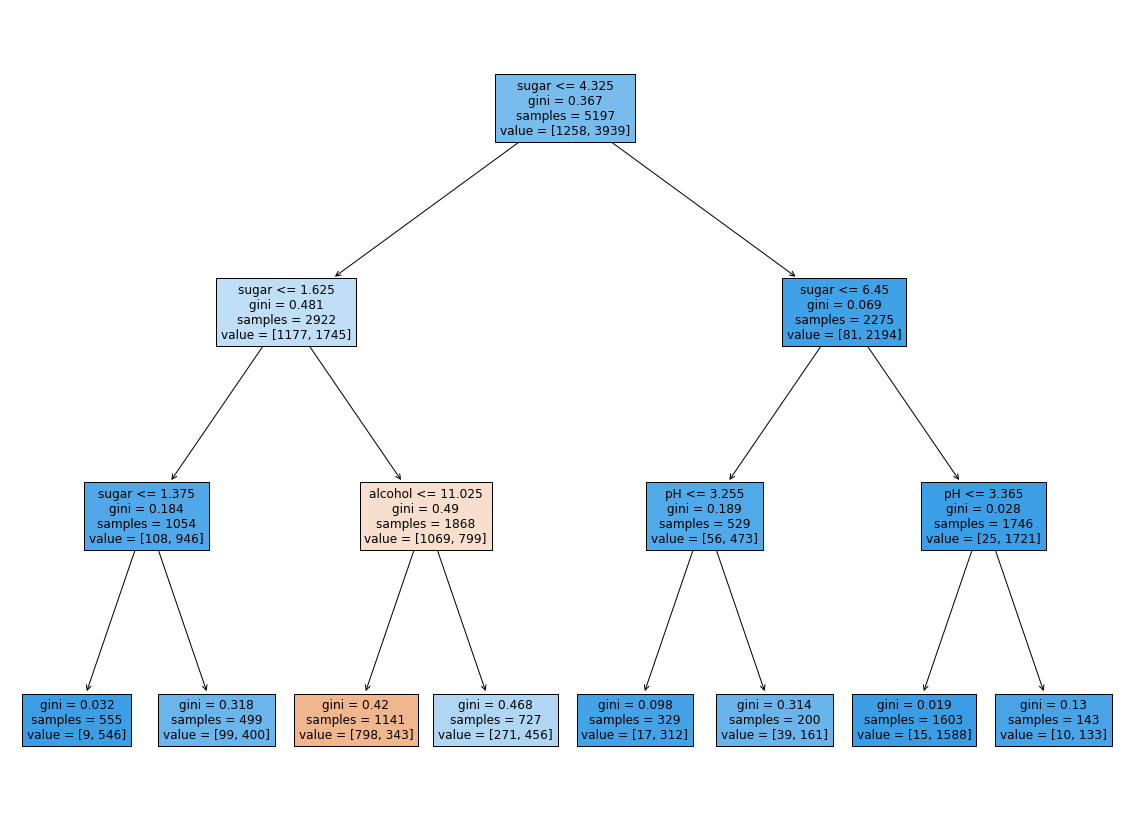

In [31]:
plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

##### 특성 중유도는 결정 트리 모델의 feature_importances_ 속성에 저장되어 있다.

In [33]:
print(dt.feature_importances_) # 이 값을 모두 더하면 1이 된다.

[0.12345626 0.86862934 0.0079144 ]


## 2. 교차 검증과 그리드 서치

##### 테스트 세트를 사용해 자꾸 성능을 확인하다 보면 점점 테스트 세트에 맞춰지게 된다.
##### 하지만 테스트 세트로 일반화 성능을 올바르게 예측하려면 가능한 한 테스트 세트를 사용하지 말아야 한다.
##### 모델을 만들고 나서 마지막에 딱 한번 사용하는 것이 좋다.

#### * 검증 세트

##### 테스트 세트를 사용하지 않으면 모델이 과대적합인지 과소적합인지 판단하기 어렵다.
##### 테스트 세트를 사용하지 않고 이를 측정하는 간단한 방법은 훈련 세트를 또 나누는 것이다.
##### 이 데이터를 검증 세트라고 부른다. 
##### 보통 20 ~ 30%를 테스트 세트와 검증 세트로 떼어 놓는다.

##### 훈련세트에서 모델을 훈련하고 검증세트로 모델을 평가한다.
##### 이런 식으로 테스트하고 싶은 매개변수를 바꿔가며 가장 좋은 모델을 고른다.
##### 그 다음 이 매개변수를 사용해 훈련세트와 검증세트를 합쳐 전체 훈련 데이터에서 모델을 다시 훈련한다.
##### 그리고 마지막에 테스트 세트에서 최종 점수를 평가한다.

In [36]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [37]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine[['class']].to_numpy()

In [38]:
# 훈련 세트와 테스트 세트 나누기

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [42]:
# 훈련 세트와 검증 세트 나누기

sub_input, val_input, sub_target, val_target = train_test_split(train_input, train_target, 
                                                            test_size=0.2, random_state=42)

In [43]:
print(sub_input.shape, val_input.shape)

(4157, 3) (1040, 3)


In [44]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(sub_input, sub_target)

print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

0.9971133028626413
0.8634615384615385


#### * 교차 검증

##### 검증 세트를 만드느라 훈련 세트가 줄었다.
##### 보통 많은 데이터를 훈련에 사용할수록 좋은 모델이 만들어진다.
##### 그렇다고 검증 세트를 너무 조금 떼어 놓으면 검증 점수가 들쭉날쭉하고 불안정할 것이다.
##### 이럴 때 교차검증을 이용하면 안정적인 검증 점수를 얻고 훈련에 더 많은 데이터를 사용할 수 있다.

##### 교차 검증은 검증 세트를 떼어 내어 평가하는 과정을 여러 번 반복한다.
##### 그 다음 이 점수를 평균하여 최종 검증 점수를 얻는다.

##### 사이킷런에는 cross_validate라는 교차 검증 함수가 있다.
##### 사용법은 간단한데, 먼저 평가할 모델 객체를 첫 번째 매개변수로 전달한다.
##### 그 다음 앞에서처럼 직접 검증 세트를 떼어 내지 않고 훈련 세트 전체를 cross_validate함수에 전달한다.

In [49]:
from sklearn.model_selection import cross_validate # default: 5

scores = cross_validate(dt, train_input, train_target)
print(scores) 

# fit_time(훈련시간), score_time(검증시간)
# 교차 검증의 최종점수는 test_score키에 담긴 5개의 점수를 평균하여 얻을 수 있다.
# 이름은 test_score지만 검증 폴드의 점수이다 !! 혼동 XX

{'fit_time': array([0.03191352, 0.00997019, 0.01694965, 0.02095008, 0.00996923]), 'score_time': array([0.00698471, 0.00100017, 0.00099778, 0.00697947, 0.00199556]), 'test_score': array([0.86538462, 0.85      , 0.87680462, 0.85370549, 0.84119346])}


In [50]:
import numpy as np

print(np.mean(scores['test_score']))

0.8574176353002148


##### 한 가지 주의할 점은 cross_Validate는 훈련 세트를 섞어 폴드를 나누지 않는다.
##### 앞서 우리는 train_test_split함수로 전체 데이트를 섞은 후 훈련 세트를 준비했기 때문에 따로 섞을 필요가 없다.
##### 하지만 만약 교차 검증을 할 때 훈련 세트를 섞으려면 분할기를 지정해야 한다.
##### 사이킷런의 분할기는 교차 검증에서 폴드를 어떻게 나눌지 결정해 준다.
##### cross_validate함수는 기본적으로
##### 회귀 모델일 경우 KFold 분할기를 사용하고
##### 분류 모델일 경우 타깃 클래스를 골고루 나누기 위해 StratifiedKFold를 사용한다.

In [53]:
from sklearn.model_selection import StratifiedKFold

scores = cross_validate(dt, train_input, train_target, cv=StratifiedKFold())
print(np.mean(scores['test_score']))

0.8574167098541498


In [54]:
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

scores = cross_validate(dt, train_input, train_target, cv=splitter)
print(np.mean(scores['test_score']))

0.8603079146287239


#### * 하이퍼파라미터 튜닝

##### 하이퍼파라미터를 튜닝하는 작업은 어떻게 진행할까?
##### 먼저 라이브러리가 제공하는 기본값을 그대로 사용해 모델을 훈련한다.
##### 그 다음 검증 세트의 점수나 교차 검증을 통해서 매개변수를 조금씩 바꿔 본다.
##### 모델마다 적게는 1~2개에서, 많게는 5~6개의 매개변수를 제공한다.
##### 이 매개변수를 바꿔가면서 모델을 훈련하고 교차 검증을 수행해야 한다.

In [56]:
##### 매개변수가 많아지면 문제는 더 복잡해진다.
##### 사이킷런에서는 제공하는 [ 그리드 서치 ]를 사용하자.

##### 사이킷런의 GridSearchCV클래스는 친절하게도 하이퍼파라미터 탐색과 교차 검증을 한 번에 수행한다.
##### 별도로 cross_validate함수를 호출할 필요가 없다.

##### 기본 매개변수를 사용한 결정 트리 모델에서 min_impurity_decrease매개변수의 최적값을 찾아본다.
##### 먼저 GridSearchCV클래스를 임포트하고 탐색할 매개변수와 탐색할 값의 리스트를 딕셔너리로 만든다.

In [57]:
from sklearn.model_selection import GridSearchCV

# 0.0001 -> 0.0005까지 0.0001씩 증가하는 5개의 값을 시도한다.
params = {'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}

In [59]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)

# n_jobs = 병렬 실행에 사용할 CPU 코어 수를 지정하는 것이 좋다.
# 이 매개변수의 기본값은 1이다. -1로 지정하면 시스템에 있는 모든 코어를 사용한다.

In [60]:
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

##### 교차 검증에서 최적의 하이퍼파라미터를 찾으면 전체 훈련 세트로 모델을 다시 만들어야 한다.

##### 아주 편리하게도 사이킷런의 그리드 서치는 훈련이 끝나면 25개의 모델 중에서
##### 검증 점수가 가장 높은 모델의 매개변수 조합으로 전체 훈련 세트에서 자동으로 다시 모델을 훈련한다.
##### 이 모델은 gs객체의 best_estimator_ 속성에 저장되어 있다.

In [61]:
dt = gs.best_estimator_
print(dt.score(train_input, train_target))

0.9615162593804117


In [63]:
# 그리드 서치로 찾은 최적의 매개변수는 best_params_ 속성에 저장되어 있다.
print(gs.best_params_)

{'min_impurity_decrease': 0.0001}


In [64]:
# 각 매개변수에서 수행한 교차 검증의 평균 점수는 cv_results_ 속성의 'mean_test_score'키에 저장되어 있다.
print(gs.cv_results_['mean_test_score'])

[0.86819297 0.86453617 0.86492226 0.86780891 0.86761605]


In [65]:
best_index = np.argmax(gs.cv_results_['mean_test_score'])
print(gs.cv_results_['params'][best_index])

{'min_impurity_decrease': 0.0001}


## ★과정 정리★

### 1. 먼저 탐색할 매개변수를 지정한다.
### 2. 그 다음 훈련 세트에서 그리드 서치를 수행하여 최상의 평균 검증 점수가 나오는 매개변수 조합을 찾는다. 이 조합은 그리드 서치 객체에 저장된다.
### 3. 그리드 서치는 최상의 매개변수에서 (교차 검증에 사용한 훈련 세트가 아니라) 전체 훈련 세트를 사용해 최종 모델을 훈련한다. 이 모델도 그리드 서치 객체에 저장된다.
### 

In [72]:
params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001),
          'max_depth': range(5, 20, 1),
          'min_samples_split': range(2, 100, 10)}

In [73]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 100, 10)})

In [74]:
print(gs.best_params_)

{'max_depth': 14, 'min_impurity_decrease': 0.0004, 'min_samples_split': 12}


In [75]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8683865773302731


#### 랜덤 서치

##### 매개변수의 값이 수치일 때, 값의 범위나 간격을 미리 정하기 어려울 수 있다.
##### 또 너무 많은 매개변수 조건이 있어 그리드 서치 수행 시간이 오래 걸릴 수 있다.
##### 이럴 때 랜덤 서치를 사용하면 좋다.

##### 랜덤 서치에는 매개변수 값의 목록을 전달하는 것이 아니라 매개변수를 샘플링 할 수 있는 확률 분포 객체를 전달한다.

#### 싸이파이(scipy)

##### 파이썬의 핵심 과학 라이브러리 중 하나이다. 
##### 적분, 보간, 선형 대수, 확률 등을 포함한 수치 계산 전용 라이브러리이다.
##### 사이킷런은 넘파이와 싸이파이 기능을 많이 사용한다.

In [79]:
from scipy.stats import uniform, randint

# uniform(실숫값), randint(정숫값)클래스는 모두 주어진 범위에서 고르게 값을 뽑는다.
# 균등분포에서 샘플링한다.

In [80]:
rgen = randint(0, 10)
rgen.rvs(10)

array([3, 7, 6, 8, 0, 6, 0, 8, 5, 6])

In [81]:
np.unique(rgen.rvs(1000), return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([106, 101, 101, 102, 109,  95, 112,  95,  97,  82], dtype=int64))

#### min_samples_leaf매개변수는
##### 리프 노드가 되기 위한 최소 샘플의 개수이다.
##### 어떤 노드가 분할하여 만들어질 자식 노드의 샘플 수가 이 값보다 작을 경우 분할하지 않는다.

In [83]:
params = {'min_impurity_decrease': uniform(0.0001, 0.001),
          'max_depth': randint(20, 50),
          'min_samples_split': randint(2, 25),
          'min_samples_leaf': randint(1, 25)}

In [84]:
# 샘플링 횟수는 사이킷런의 랜덤 서치 클래스인 RandomizedSearchCV의 n_iter매개변수에 지정한다.

from sklearn.model_selection import RandomizedSearchCV

gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), 
                        params, n_iter=100, n_jobs=-1, random_state=42)
gs.fit(train_input, train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002157E67B3A0>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002157FF57610>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002157E67BC10>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002157FF64BE0>},
                   random_state=42)

In [85]:
print(gs.best_params_)

{'max_depth': 39, 'min_impurity_decrease': 0.00034102546602601173, 'min_samples_leaf': 7, 'min_samples_split': 13}


In [86]:
# 최고의 교차 검증 점수도 확인해 본다.
print(np.max(gs.cv_results_['mean_test_score']))

0.8695428296438884


In [87]:
# 최적의 모델은 이미 전체 훈련 세트(train_input, train_target)로 훈련되어
# best_estimator_ 속성에 저장되어 있다.
dt = gs.best_estimator_
print(dt.score(test_input, test_target))

0.86


## 3. 트리의 앙상블

#### 정형 데이터와 비정형 데이터

##### 정형데이터 = 어떤 구조로 되어 있음
##### 비정형데이터 = 데이터베이스나 엑셀로 표현하기 어려운 것들

##### 지금까지 배운 머신러닝 알고리즘은 정형 데이터에 잘 맞는다.
##### 그 중에 정형 데이터를 다루는 데 가장 뛰어난 성과를 내는 알고리즘이 [ 앙상블 학습 ] 이다.
##### 이 알고리즘은 대부분 결정 트리를 기반으로 만들어져 있다.

#### * 랜덤 포레스트

##### 앙상블 학습의 대표 주자 중 하나로 안정적인 성능 덕분에 널리 사용되고 있다.
##### 앙상블 학습을 적용할 때 가장 먼저 랜덤 포레스트를 시도해 보길 권한다.